## Package Import

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

## File Upload into Env

In [4]:
# Public URL after making the file public in the format 'https://storage.googleapis.com/...'
file_url = 'https://storage.googleapis.com/home_credit_files/application_train.csv'
test_url = 'https://storage.googleapis.com/home_credit_files/application_test.csv'
# POS_CASH_balance_url = 'https://storage.googleapis.com/home_credit_files/POS_CASH_balance.csv'
# bureau_url = 'https://storage.googleapis.com/home_credit_files/bureau.csv'
# bureau_balance_url = 'https://storage.googleapis.com/home_credit_files/bureau.csv'
# credit_card_balance = 'https://storage.googleapis.com/home_credit_files/credit_card_balance.csv'
# installments_payments = 'https://storage.googleapis.com/home_credit_files/credit_card_balance.csv'
# previous_application = 'https://storage.googleapis.com/home_credit_files/previous_application.csv'


# Read the CSV directly from the URL
df = pd.read_csv(file_url)

#print(df.head())

C:\Users\Owner\AppData\Local\Temp\ipykernel_10720\3847801500.py:13: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_url)


## EDA

In [5]:
print(df.shape)

(307511, 122)


In [6]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [7]:
df['TARGET'].value_counts(normalize = True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### Evaluating Missingness

In [8]:
# Train data set

# calculate total number of missing values for each column
missing_values_train = df.isnull().sum()

# calculate total number of rows
total_rows_train = df.shape[0]

# calculate percentage of missing values for each column
pct_missing_train = (missing_values_train / total_rows_train) * 100

# sort output
pct_missing_sorted_train = pct_missing_train.sort_values(ascending=False)

# print result
print(pct_missing_sorted_train.head(25))

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
dtype: float64


In [9]:
missings = pct_missing_sorted_train.to_frame(name='MissingPercentage')
print(missings)

                          MissingPercentage
COMMONAREA_MEDI                   69.872297
COMMONAREA_AVG                    69.872297
COMMONAREA_MODE                   69.872297
NONLIVINGAPARTMENTS_MODE          69.432963
NONLIVINGAPARTMENTS_AVG           69.432963
...                                     ...
NAME_HOUSING_TYPE                  0.000000
NAME_FAMILY_STATUS                 0.000000
NAME_EDUCATION_TYPE                0.000000
NAME_INCOME_TYPE                   0.000000
SK_ID_CURR                         0.000000

[122 rows x 1 columns]


### Removing columns with greater than 10% missing values

In [10]:
filter_missings = missings[(missings['MissingPercentage'] < 10)]
filter_missings.shape

(65, 1)

### Removing 'FLAG' columns and ID column

In [11]:
columns = list(filter_missings.index)
column_list = [item for item in columns if 'FLAG' not in item]
#column_list_2 = [item for item in column_list if 'TARGET' not in item]
column_list_3 = [item for item in column_list if 'SK_ID_CURR' not in item]

### Removing additional unhelpful columns

In [12]:
list1 = column_list_3
list2 = ['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

# Initialize an empty list to store items from list1 that are not in list2
items_not_in_list2 = []

# Iterate through each item in list1
for item in list1:
    # Check if the item is not in list2
    if item not in list2:
        # Add the item to the items_not_in_list2 list
        items_not_in_list2.append(item)

# Print the items that are not in list2
items_not_in_list2

['EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_CHILDREN',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [13]:
len(items_not_in_list2)

31

In [14]:
pd.set_option('display.max_columns', None)
selected_df = df[items_not_in_list2]
selected_df

,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,0.593984,360000.0,13059.0,2.0,-3219.0,0,Cash loans,F,360000.0,90000.0,0,0,0,0,0,0,0,8,THURSDAY,2,2,XNA,-4703,-14020.0,365243,-21950,0.014520,House / apartment,Married,Secondary / secondary special,Pensioner
1,0.067658,675000.0,57685.5,2.0,-1244.0,0,Cash loans,F,728460.0,135000.0,0,0,0,0,0,0,0,8,TUESDAY,2,2,School,-1980,-6928.0,-8615,-15645,0.015221,House / apartment,Married,Secondary / secondary special,State servant
2,0.037153,180000.0,9000.0,1.0,-265.0,0,Revolving loans,M,180000.0,225000.0,0,0,0,0,0,0,0,10,MONDAY,2,2,Self-employed,-389,-6740.0,-1049,-11926,0.025164,With parents,Single / not married,Secondary / secondary special,Working
3,0.355276,675000.0,21775.5,2.0,-135.0,1,Cash loans,F,675000.0,72000.0,0,0,0,0,0,0,0,13,THURSDAY,2,2,Self-employed,-2976,-4146.0,-795,-15597,0.019101,House / apartment,Separated,Secondary / secondary special,Working
4,0.656941,450000.0,25407.0,1.0,-1062.0,0,Cash loans,M,545040.0,157500.0,0,0,0,0,0,0,0,12,MONDAY,2,2,Business Entity Type 2,-2010,-2010.0,-1769,-13220,0.006629,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.421587,679500.0,30280.5,2.0,-709.0,0,Cash loans,F,760225.5,135000.0,0,0,0,0,0,0,0,10,THURSDAY,2,2,School,-4319,-12111.0,-361,-20794,0.022625,House / apartment,Married,Secondary / secondary special,Working
307507,0.352721,270000.0,17383.5,1.0,-2015.0,0,Cash loans,M,270000.0,135000.0,0,0,0,0,0,0,0,12,MONDAY,2,2,Business Entity Type 3,-3883,-5457.0,-672,-11714,0.022625,House / apartment,Single / not married,Secondary / secondary special,Working
307508,0.772387,562500.0,20808.0,2.0,-1543.0,0,Cash loans,M,651600.0,270000.0,0,0,0,0,0,0,0,10,MONDAY,2,2,Self-employed,-5193,-1923.0,-1405,-16424,0.008019,House / apartment,Married,Secondary / secondary special,Working
307509,0.730652,1354500.0,55296.0,2.0,-3146.0,0,Cash loans,M,1354500.0,225000.0,0,0,0,0,0,0,0,11,MONDAY,2,2,Legal Services,-5004,-2380.0,-4587,-14164,0.019689,House / apartment,Married,Higher education,Working


In [15]:
# Extract the 'TARGET' column
target = selected_df['TARGET']

# Remove the 'TARGET' column from the dataframe and reassign the result back to selected_df
selected_df = selected_df.drop(columns=['TARGET'])

# Insert the 'TARGET' column at the beginning of the dataframe
selected_df.insert(0, 'TARGET', target)

### Fix problematic values

In [16]:
len(column_list_3)
print(sum(selected_df['DAYS_EMPLOYED']))

19623828581


In [17]:
selected_df.loc[:, 'DAYS_EMPLOYED'] = selected_df['DAYS_EMPLOYED'].replace(365243, 0)
selected_df = selected_df[selected_df['AMT_INCOME_TOTAL'] <= 9000000]

In [18]:
selected_df = selected_df.drop(columns = ['HOUR_APPR_PROCESS_START', 'DAYS_ID_PUBLISH'])
selected_df

,TARGET,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,ORGANIZATION_TYPE,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,0,0.593984,360000.0,13059.0,2.0,-3219.0,0,Cash loans,F,360000.0,90000.0,0,0,0,0,0,0,THURSDAY,2,2,XNA,-14020.0,0,-21950,0.014520,House / apartment,Married,Secondary / secondary special,Pensioner
1,0,0.067658,675000.0,57685.5,2.0,-1244.0,0,Cash loans,F,728460.0,135000.0,0,0,0,0,0,0,TUESDAY,2,2,School,-6928.0,-8615,-15645,0.015221,House / apartment,Married,Secondary / secondary special,State servant
2,0,0.037153,180000.0,9000.0,1.0,-265.0,0,Revolving loans,M,180000.0,225000.0,0,0,0,0,0,0,MONDAY,2,2,Self-employed,-6740.0,-1049,-11926,0.025164,With parents,Single / not married,Secondary / secondary special,Working
3,0,0.355276,675000.0,21775.5,2.0,-135.0,1,Cash loans,F,675000.0,72000.0,0,0,0,0,0,0,THURSDAY,2,2,Self-employed,-4146.0,-795,-15597,0.019101,House / apartment,Separated,Secondary / secondary special,Working
4,0,0.656941,450000.0,25407.0,1.0,-1062.0,0,Cash loans,M,545040.0,157500.0,0,0,0,0,0,0,MONDAY,2,2,Business Entity Type 2,-2010.0,-1769,-13220,0.006629,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0.421587,679500.0,30280.5,2.0,-709.0,0,Cash loans,F,760225.5,135000.0,0,0,0,0,0,0,THURSDAY,2,2,School,-12111.0,-361,-20794,0.022625,House / apartment,Married,Secondary / secondary special,Working
307507,0,0.352721,270000.0,17383.5,1.0,-2015.0,0,Cash loans,M,270000.0,135000.0,0,0,0,0,0,0,MONDAY,2,2,Business Entity Type 3,-5457.0,-672,-11714,0.022625,House / apartment,Single / not married,Secondary / secondary special,Working
307508,0,0.772387,562500.0,20808.0,2.0,-1543.0,0,Cash loans,M,651600.0,270000.0,0,0,0,0,0,0,MONDAY,2,2,Self-employed,-1923.0,-1405,-16424,0.008019,House / apartment,Married,Secondary / secondary special,Working
307509,0,0.730652,1354500.0,55296.0,2.0,-3146.0,0,Cash loans,M,1354500.0,225000.0,0,0,0,0,0,0,MONDAY,2,2,Legal Services,-2380.0,-4587,-14164,0.019689,House / apartment,Married,Higher education,Working


In [19]:
# Abs value of negatives
selected_df['DAYS_LAST_PHONE_CHANGE'] = selected_df.loc[:, 'DAYS_LAST_PHONE_CHANGE'].abs()
#selected_df['DAYS_ID_PUBLISH'] = selected_df.loc[:, 'DAYS_ID_PUBLISH'].abs()
selected_df['DAYS_REGISTRATION'] = selected_df.loc[:, 'DAYS_REGISTRATION'].abs()
selected_df['DAYS_EMPLOYED'] = selected_df.loc[:, 'DAYS_EMPLOYED'].abs()
selected_df['DAYS_BIRTH'] = selected_df.loc[:, 'DAYS_BIRTH'].abs()

## Preparing Logistic Regression

In [20]:
# Grab numeric columns
numeric_cols = selected_df.select_dtypes(include='number')
numeric_cols

,TARGET,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE
0,0,0.593984,360000.0,13059.0,2.0,3219.0,0,360000.0,90000.0,0,0,0,0,0,0,2,2,14020.0,0,21950,0.014520
1,0,0.067658,675000.0,57685.5,2.0,1244.0,0,728460.0,135000.0,0,0,0,0,0,0,2,2,6928.0,8615,15645,0.015221
2,0,0.037153,180000.0,9000.0,1.0,265.0,0,180000.0,225000.0,0,0,0,0,0,0,2,2,6740.0,1049,11926,0.025164
3,0,0.355276,675000.0,21775.5,2.0,135.0,1,675000.0,72000.0,0,0,0,0,0,0,2,2,4146.0,795,15597,0.019101
4,0,0.656941,450000.0,25407.0,1.0,1062.0,0,545040.0,157500.0,0,0,0,0,0,0,2,2,2010.0,1769,13220,0.006629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0.421587,679500.0,30280.5,2.0,709.0,0,760225.5,135000.0,0,0,0,0,0,0,2,2,12111.0,361,20794,0.022625
307507,0,0.352721,270000.0,17383.5,1.0,2015.0,0,270000.0,135000.0,0,0,0,0,0,0,2,2,5457.0,672,11714,0.022625
307508,0,0.772387,562500.0,20808.0,2.0,1543.0,0,651600.0,270000.0,0,0,0,0,0,0,2,2,1923.0,1405,16424,0.008019
307509,0,0.730652,1354500.0,55296.0,2.0,3146.0,0,1354500.0,225000.0,0,0,0,0,0,0,2,2,2380.0,4587,14164,0.019689


In [21]:
# Create a list of numeric column names excluding target for imputations

column_names = numeric_cols.columns.tolist()
my_list = [x for x in column_names if x != 'TARGET']
print(my_list)

['EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE']


### N/a Imputer

In [22]:
# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='median')

# Fit and transform the selected numeric columns
selected_df.loc[:, my_list] = imputer.fit_transform(selected_df.loc[:, my_list])

In [23]:
selected_df.isnull().sum()

TARGET                         0
EXT_SOURCE_2                   0
AMT_GOODS_PRICE                0
AMT_ANNUITY                    0
CNT_FAM_MEMBERS                0
DAYS_LAST_PHONE_CHANGE         0
CNT_CHILDREN                   0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
LIVE_CITY_NOT_WORK_CITY        0
REG_CITY_NOT_WORK_CITY         0
REG_CITY_NOT_LIVE_CITY         0
LIVE_REGION_NOT_WORK_REGION    0
REG_REGION_NOT_WORK_REGION     0
REG_REGION_NOT_LIVE_REGION     0
WEEKDAY_APPR_PROCESS_START     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
ORGANIZATION_TYPE              0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
NAME_HOUSING_TYPE              0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
dtype: int64

## Interaction Term

In [24]:
selected_df['CREDIT_TO_INCOME'] = selected_df['AMT_CREDIT']/selected_df['AMT_INCOME_TOTAL']

### Standard Scaler to scale dataset

In [25]:
scalar_list = ['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','CREDIT_TO_INCOME']

In [26]:
scaler = StandardScaler()

# Fit and transform the selected columns
selected_df[scalar_list] = scaler.fit_transform(selected_df[scalar_list])

### Dummy Encoder 

In [27]:
# dummy encoding data set

selected_df = pd.get_dummies(selected_df, drop_first=True)

### Splitting Target and Predictors

In [28]:
X = selected_df.drop(columns=['TARGET'])
y = selected_df['TARGET']

## Logistic Regression 

In [45]:
# Initializing and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Making predictions on the validation set
y_pred = log_reg.predict(X)

# Calculating the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Train Accuracy:", accuracy)
print("Train R2 = ", log_reg.score(X, y))

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train Accuracy: 0.9192736449133031
Train R2 =  0.9192736449133031


## Cross Validation

### Mean Squared Error

In [ ]:


# Call the function  and define a scoring function - set it as "neg_mean_squared_error"
log_scores = cross_val_score(log_reg, 
                             X, 
                             y,
                             scoring="neg_mean_squared_error",   # higher return values are better for this function
                             cv=10                               # create 10 folds
)

# to obtain RMSE, we need to negate the scores obtained  from cross_val_score and take the sqrt.
# this returns an array of 10 values
log_rmse_scores = np.sqrt(-log_scores)


In [34]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [56]:
display_scores(log_rmse_scores)

Scores: [0.28410002 0.28392827 0.28404278 0.28427167 0.28415725 0.28421446
 0.28415725 0.28404278 0.28399015 0.28410464]
Mean: 0.28410092814514315
Standard deviation: 9.861160010040639e-05


### R Squared

In [57]:
log_r2_scores = cross_val_score(log_reg, 
                             X, y,
                             scoring="r2", 
                             cv=10)
display_scores(log_r2_scores)

Scores: [-0.08779936 -0.08648453 -0.08736108 -0.08911418 -0.08783784 -0.08827595
 -0.08783784 -0.08696161 -0.08692591 -0.08780246]
Mean: -0.08764007575985691
Standard deviation: 0.0007134957901900151


## XGboost

In [89]:

xgb_clf = XGBClassifier(use_label_encoder=False, 
                        eval_metric='logloss', 
                        n_estimators=100, 
                        max_depth=4
                        )

xgb_clf.fit(X, y)

xgb_y_pred = xgb_clf.predict(X)

xgb_accuracy = accuracy_score(y, xgb_y_pred)

print("Train Accuracy:", xgb_accuracy)
print("Train Accuracy using built-in score:", xgb_clf.score(X, y))

Train Accuracy: 0.9194817695799784
Train Accuracy using built-in score: 0.9194817695799784


In [68]:
xgb_scores = cross_val_score(xgb_clf, 
                             X, 
                             y,
                             scoring="neg_mean_squared_error", 
                             cv=10                               
)
xgb_rmse_scores = np.sqrt(-xgb_scores)

In [69]:
display_scores(xgb_scores)

Scores: [-0.083542   -0.08308673 -0.08373711 -0.08259894 -0.08308673 -0.08055023
 -0.08087542 -0.08220871 -0.08227642 -0.08198374]
Mean: -0.08239460264759715
Standard deviation: 0.001002280524294479


In [90]:
xgb_auc_scores = cross_val_score(xgb_clf, 
                             X, 
                             y,
                             scoring="roc_auc", 
                             cv=10                               
)
xgb_mean_auc = np.mean(xgb_auc_scores)

In [91]:
display_scores(xgb_auc_scores)

Scores: [0.70159317 0.71958385 0.71949374 0.71601226 0.71604402 0.75610023
 0.71818085 0.69783179 0.71091463 0.71473086]
Mean: 0.7170485401981802
Standard deviation: 0.014805251018788513


## Random Forest

In [106]:
rf_clf = RandomForestClassifier(n_estimators=100, 
                                max_depth=6, 
                                random_state=42)

rf_clf.fit(X, y)

rf_y_pred = rf_clf.predict(X)

accuracy = accuracy_score(y, rf_y_pred)
print("Train Accuracy:", accuracy)
print("Train Accuracy using built-in score:", rf_clf.score(X, y))

Train Accuracy: 0.9192736449133031
Train Accuracy using built-in score: 0.9192736449133031


In [94]:
rf_scores = cross_val_score(rf_clf, 
                             X, 
                             y,
                             scoring="neg_mean_squared_error", 
                             cv=10                               
)
rf_rmse_scores = np.sqrt(-rf_scores)

In [95]:
display_scores(rf_scores)

Scores: [-0.08071282 -0.08071282 -0.08071282 -0.08071282 -0.08074534 -0.08074534
 -0.08074534 -0.08074534 -0.08071545 -0.08071545]
Mean: -0.08072635501575334
Standard deviation: 1.5532093012324882e-05


In [107]:
rf_auc_scores = cross_val_score(rf_clf, 
                             X, 
                             y,
                             scoring="roc_auc", 
                             cv=10                               
)
rf_mean_auc = np.mean(rf_auc_scores)

In [108]:
display_scores(rf_auc_scores)

Scores: [0.67549461 0.69854849 0.69322607 0.69522877 0.69212249 0.73848902
 0.69255539 0.67253134 0.68023538 0.68756203]
Mean: 0.692599360338626
Standard deviation: 0.017384847428071483


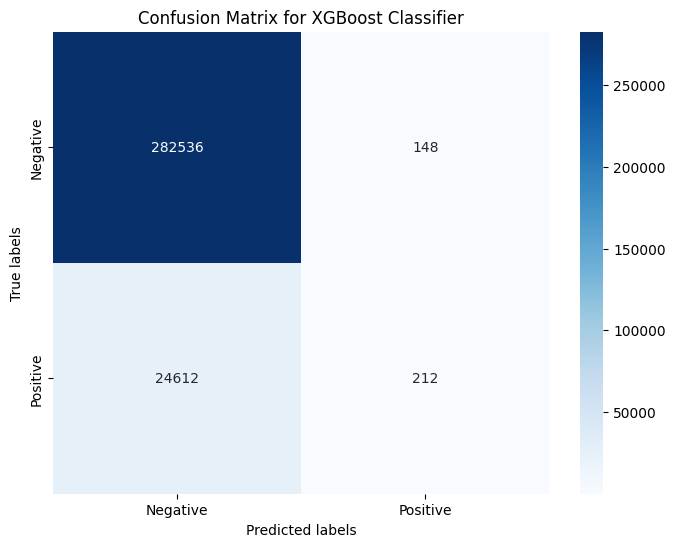

In [92]:
cm = confusion_matrix(y, xgb_y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


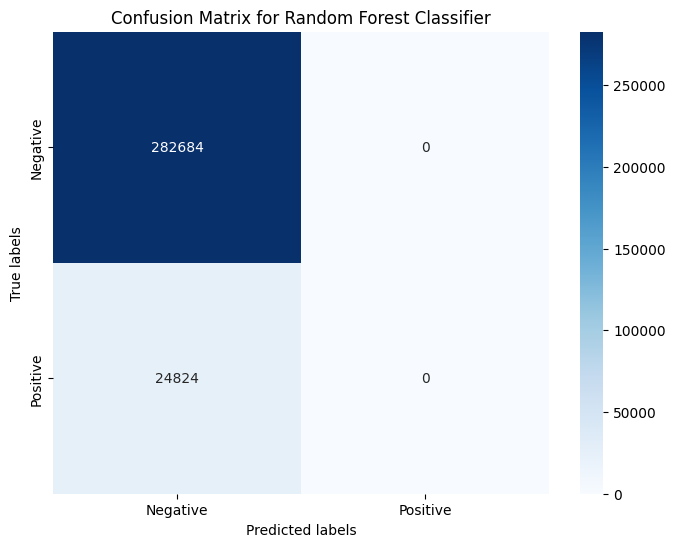

In [111]:
cm = confusion_matrix(y, rf_y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

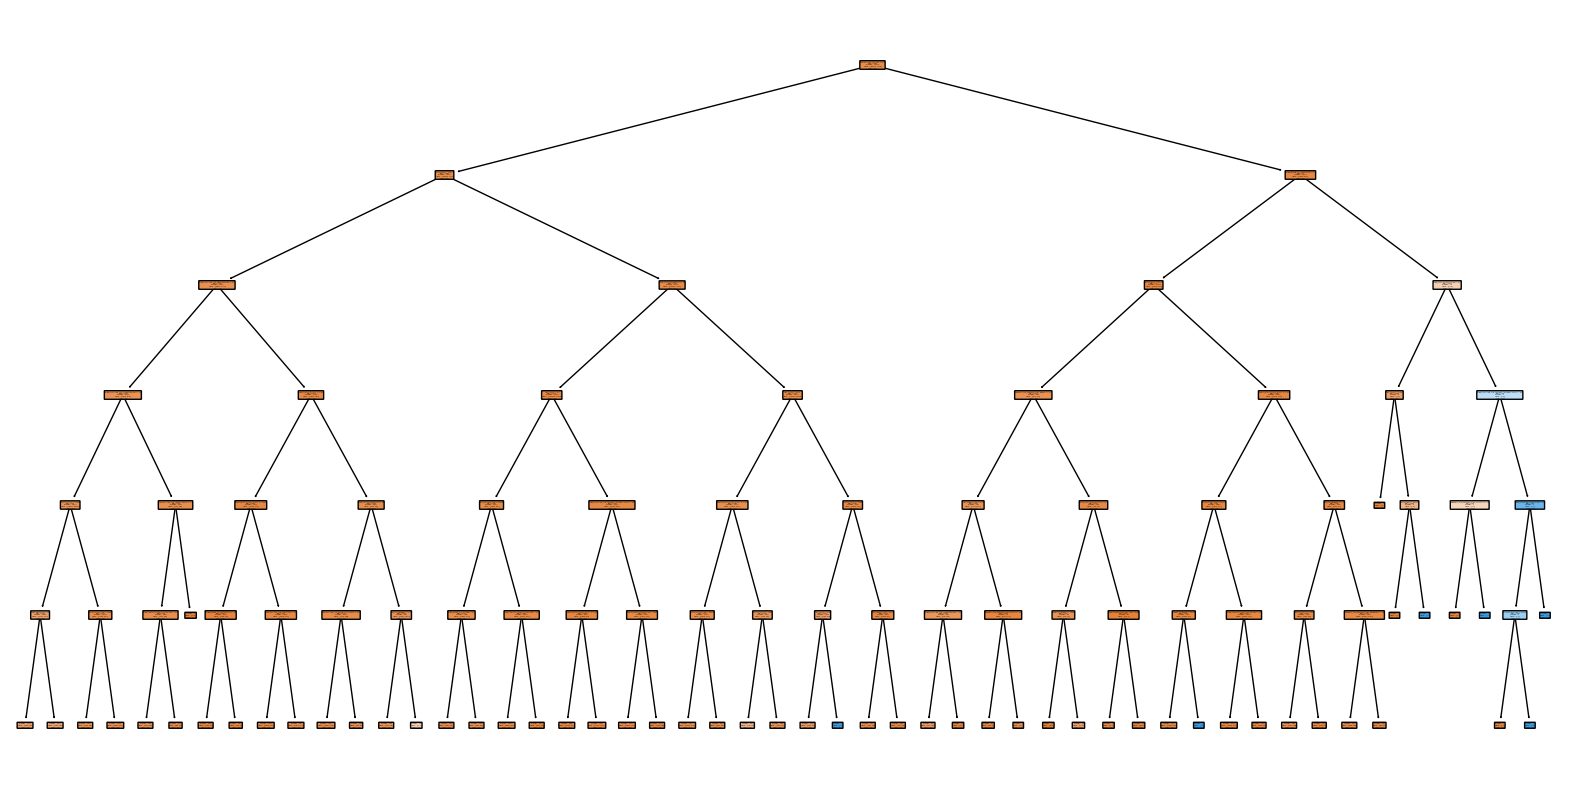

In [110]:
single_tree = rf_clf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

## GBM

In [113]:

# Initialize the Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier(n_estimators=100, 
                                     max_depth=4, 
                                     random_state=42)

# Train the model on the dataset
gbm_clf.fit(X, y)

# Make predictions on the training set
gbm_y_pred = gbm_clf.predict(X)

# Calculate the accuracy of the model
gbm_accuracy = accuracy_score(y, gbm_y_pred)

print("Train Accuracy:", gbm_accuracy)


Train Accuracy: 0.9196898942466537


In [114]:
gbm_auc_scores = cross_val_score(gbm_clf, 
                             X, 
                             y,
                             scoring="roc_auc", 
                             cv=10                               
)
gbm_mean_auc = np.mean(gbm_auc_scores)
display_scores(gbm_auc_scores)

KeyboardInterrupt: 

# Load Test

In [ ]:
test_df = pd.read_csv(test_url)